In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from rutas import *

%matplotlib inline

In [2]:
avisos_detalle = pd.read_csv(RUTA_DATOS_PROCESADOS + 'avisos_detalle.csv')
entrenamiento = pd.read_csv(RUTA_DATOS_PROCESADOS + 'entrenamiento.csv')
no_postulados = pd.read_csv(RUTA_SET_NO_POSTULADOS)
postulantes = pd.read_csv(RUTA_TMP + 'postulantes_v2.csv') #RUTA_VECTOR_POSTULANTES)

In [3]:
no_postulados = no_postulados.drop(labels='Unnamed: 0',axis=1)

In [4]:
no_postulados = no_postulados.append(entrenamiento[entrenamiento['sepostulo'] == 0], sort=False).drop_duplicates()
entrenamiento = entrenamiento[entrenamiento['sepostulo'] == 1]
#entrenamiento = pd.concat([entrenamiento,no_postulados], sort=False)

In [5]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
ada = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=40, max_features=200, min_samples_split=15, criterion='entropy', n_jobs=-1, verbose=1), n_estimators=15)
#ada = AdaBoostClassifier(base_estimator=ExtraTreesClassifier(n_estimators=10, max_features=100, min_samples_split=10, n_jobs=-1, verbose=1), n_estimators=10)

In [6]:
MAX_SAMPLE_SIZE = 2000000
TRAINING_SIZE   = int(MAX_SAMPLE_SIZE * 0.7)
CANT_POSTULADOS = int(MAX_SAMPLE_SIZE * 0.4)
entrenamiento = entrenamiento.sample(n=CANT_POSTULADOS)
no_postulados = no_postulados.sample(n=(MAX_SAMPLE_SIZE - CANT_POSTULADOS))

In [7]:
entrenamiento = pd.concat([entrenamiento, no_postulados], sort=False).sample(n=MAX_SAMPLE_SIZE)

In [8]:
entrenamiento = pd.merge(entrenamiento, postulantes, on='idpostulante', how='inner')
entrenamiento = pd.merge(entrenamiento, avisos_detalle, on='idaviso', how='inner')

In [9]:
entrenamiento.drop(axis=1, labels=['idaviso', 'idpostulante'], inplace=True)

In [10]:
entrenamiento.loc[entrenamiento['sexo_y'].isna(),'sexo_y'] = 0
entrenamiento.loc[entrenamiento['edad_y'].isna(),'edad_y'] = 30
entrenamiento.loc[entrenamiento['cant_postulaciones_area'].isna(),'cant_postulaciones_area'] = 0
entrenamiento.loc[entrenamiento['cant_postulaciones_empresa'].isna(),'cant_postulaciones_empresa'] = 0
entrenamiento.loc[entrenamiento['cant_vistas'].isna(),'cant_vistas'] = 0
entrenamiento.loc[entrenamiento['cant_vistas_area'].isna(),'cant_vistas_area'] = 0
entrenamiento.loc[entrenamiento['cant_vistas_empresa'].isna(),'cant_vistas_empresa'] = 0
training = entrenamiento[:TRAINING_SIZE]
test = entrenamiento[TRAINING_SIZE:]
y_training = training['sepostulo']
training = training.drop(axis=1, labels=['sepostulo'])

In [11]:
ada.fit(training, y_training)

[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  8.6min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 35.4min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 57.8min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   12.5s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 58.3min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   13.4s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 58.1min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   14.8s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 55.2min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   13.5s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 54.1min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   13.4s finished
[Parallel(n_j

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=200, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False),
          learning_rate=1.0, n_estimators=15, random_state=None)

In [17]:
y_test = test['sepostulo']
test = test.drop(axis=1, labels=['sepostulo'])

KeyError: 'sepostulo'

In [18]:
ada.score(test, y_test)

[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    3.8s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    5.6s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    7.6s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    8.9s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   10.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    9.8s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    9.3s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    9.8s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    9.0s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    9.1s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    8.3s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    8.9s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    8.6s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    8.8s finished
[Parallel(n_jobs=4)]

0.9852228637199028

In [19]:
ret = ada.predict_proba(test)

[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    4.0s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    6.1s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    8.0s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    8.3s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    9.6s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    9.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    9.8s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   10.0s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    9.0s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    8.3s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    7.8s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    7.7s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    7.8s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    9.0s finished
[Parallel(n_jobs=4)]

In [20]:
ret = pd.DataFrame(ret)

In [21]:
ret[1].hist()

In [22]:
from sklearn.metrics import roc_auc_score

In [25]:
roc_auc_score(y_test, ret[1], average=None)

0.9989840786301447

In [26]:
test_o = pd.read_csv(RUTA_DATOS_PROCESADOS + 'kaggle.csv')
test = pd.merge(test_o, postulantes, on='idpostulante', how='left')
test = pd.merge(test, avisos_detalle, on='idaviso', how='left')
test = test.drop(axis=1, labels=['id', 'idaviso', 'idpostulante'])
test[test['sexo_y'].isna()] = 0
test[test['edad_y'].isna()] = 30
test[test['sexo_x'].isna()] = 0
test[test['edad_x'].isna()] = 30
test[test['cant_postulaciones_area'].isna()] = 0
test[test['cant_postulaciones_empresa'].isna()] = 0
test[test['cant_vistas'].isna()] = 0
test[test['cant_vistas_area'].isna()] = 0
test[test['cant_vistas_empresa'].isna()] = 0
test[test['nivel_educativo_x'].isna()] = 0
ret = ada.predict_proba(test)

[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    2.9s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    5.5s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    6.1s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    7.1s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    7.1s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    7.7s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    6.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    7.0s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    8.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    9.0s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    8.3s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    8.1s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    7.2s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    6.8s finished
[Parallel(n_jobs=4)]

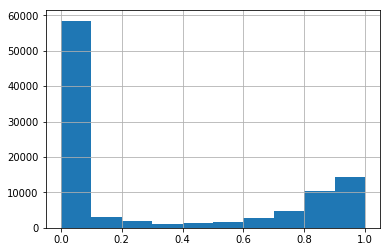

In [27]:
test_o['sepostulo'] = pd.DataFrame(ret)[1]
test_o['sepostulo'].hist()

In [28]:
test_o = test_o.drop(axis=1, labels=['idaviso', 'idpostulante','cant_vistas', 'cant_vistas_empresa', 'cant_vistas_area','cant_postulaciones_empresa', 'cant_postulaciones_area'])
test_o.to_csv(RUTA_SUBMITS + 'submit-19.csv', index=False)